In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

datafile_path = "./result.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)  # convert string to numpy array
matrix = np.vstack(df.embedding.values)
matrix.shape

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, n_init='auto', init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

display(df)

,Diocese,Tagline,embedding,Cluster
0,Bath and Wells,Living the story. Telling the story.,"[0.0021276772, -0.018717136, 0.0002589343, -0....",4
1,Birmingham,Transforming Church,"[-0.01682907, -0.007491563, -0.013837834, 0.00...",2
2,Blackburn,Healthy Churches Transforming Communities,"[-0.0061668516, -0.015716586, -0.007351519, 0....",2
3,Bristol,Transforming Church. Together.,"[-0.012137135, -0.017045632, -0.015543578, 0.0...",2
4,Canterbury,Changed Lives -> Changing Lives,"[-0.017170066, -0.0019085291, 0.0041451915, -0...",2
5,Carlisle,God for all,"[-0.00062275893, -0.01157451, -0.01718563, -0....",1
6,Chelmsford,Travelling Well Together,"[-0.0011504561, -0.004316697, 0.043816797, -0....",5
7,Chester,"Together in Christ, Sharing Hope","[0.0010544007, -0.015943889, 0.0070261206, -0....",1
8,Chichester,Know Love Follow Jesus,"[-0.007092128, -0.0010182633, -0.01613983, -0....",5
9,Coventry,Worshipping God - Making New Disciples - Trans...,"[-9.054881e-05, -0.014220843, -0.013712956, 0....",1


In [5]:
df.groupby("Cluster")

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)
vis_dims2.shape

(40, 2)

Text(0.5, 1.0, 'Clusters identified in 2d using t-SNE')

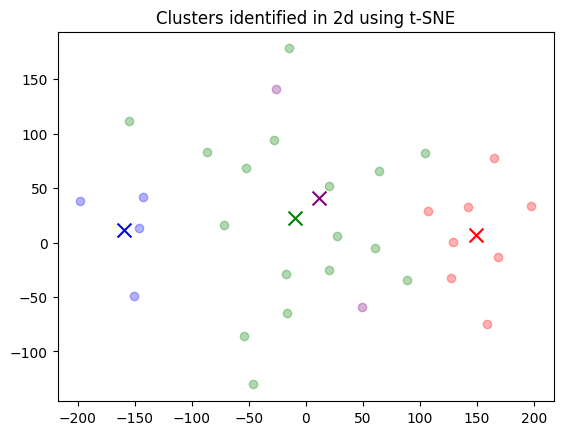

In [6]:
x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified in 2d using t-SNE")